# Frequency Distribution (NLTK implementation)

In [1]:
from datasets import load_dataset
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from collections import Counter
import re
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

resume_dataset = load_dataset("Sachinkelenjaguri/Resume_dataset")

Found cached dataset csv (/Users/bpayne/.cache/huggingface/datasets/Sachinkelenjaguri___csv/Sachinkelenjaguri--Resume_dataset-19bbf7d17688d8d6/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
resume_dataset.shape

{'train': (962, 2)}

In [3]:
resume_dataset.column_names

{'train': ['Category', 'Resume']}

In [4]:
# load the data in a dataframe
text = pd.DataFrame(resume_dataset['train'])
text.head()
text.Resume[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \n\nData Science Assurance Associate \n\nData Science Assurance Associate - Ernst & Young LLP\nSkill Details \nJAVASCRIPT- Exprience - 24 months\njQuery- Exprience - 24 months\nPython- Exprience - 24 monthsCompany Details \ncompany - Ernst & Young LLP\ndescription - Fraud Investigations and Dispute Servi

# Tokenization (example on single resume record)

In [5]:
tokens = word_tokenize(resume_dataset['train']['Resume'][0])
print(tokens)

['Skills', '*', 'Programming', 'Languages', ':', 'Python', '(', 'pandas', ',', 'numpy', ',', 'scipy', ',', 'scikit-learn', ',', 'matplotlib', ')', ',', 'Sql', ',', 'Java', ',', 'JavaScript/JQuery', '.', '*', 'Machine', 'learning', ':', 'Regression', ',', 'SVM', ',', 'NaÃ¯ve', 'Bayes', ',', 'KNN', ',', 'Random', 'Forest', ',', 'Decision', 'Trees', ',', 'Boosting', 'techniques', ',', 'Cluster', 'Analysis', ',', 'Word', 'Embedding', ',', 'Sentiment', 'Analysis', ',', 'Natural', 'Language', 'processing', ',', 'Dimensionality', 'reduction', ',', 'Topic', 'Modelling', '(', 'LDA', ',', 'NMF', ')', ',', 'PCA', '&', 'Neural', 'Nets', '.', '*', 'Database', 'Visualizations', ':', 'Mysql', ',', 'SqlServer', ',', 'Cassandra', ',', 'Hbase', ',', 'ElasticSearch', 'D3.js', ',', 'DC.js', ',', 'Plotly', ',', 'kibana', ',', 'matplotlib', ',', 'ggplot', ',', 'Tableau', '.', '*', 'Others', ':', 'Regular', 'Expression', ',', 'HTML', ',', 'CSS', ',', 'Angular', '6', ',', 'Logstash', ',', 'Kafka', ',', 'Pytho

# Tokenization (example on entire dataset)

In [6]:
cumulative_list = []
tagged = []
for label in text.keys():
    tokens = []

    for results in text[label]:
        tokens = tokens + nltk.word_tokenize(str(results))

    cumulative_list = cumulative_list + tokens

word_tokens = pd.array(cumulative_list)
word_tokens.view()

<StringArray>
[    'Data',  'Science',     'Data',  'Science',     'Data',  'Science',
     'Data',  'Science',     'Data',  'Science',
 ...
        '8',        ',',  'Windows',       '10',     'Role', 'Software',
  'Testing', 'Duration',        '6',   'months']
Length: 499231, dtype: string

# POS (Parts of Speech) tagging

In [7]:
tagged = nltk.pos_tag(word_tokens)
counts = Counter( tag for word, tag in tagged)
print("POS:",counts)

POS: Counter({'NNP': 136027, 'NN': 75494, 'IN': 37217, 'NNS': 34296, ',': 25944, 'JJ': 25261, 'CC': 22663, '.': 21075, ':': 19207, 'DT': 16772, 'VBG': 14255, 'CD': 13646, 'VB': 9712, 'TO': 7558, 'VBN': 6149, 'VBD': 4534, 'VBZ': 3968, 'VBP': 3765, 'RB': 3760, ')': 3350, '(': 3091, 'NNPS': 2289, 'PRP': 1795, 'JJR': 1384, 'PRP$': 1083, 'WDT': 934, 'POS': 902, 'MD': 730, 'RP': 482, 'FW': 428, 'PDT': 293, 'JJS': 278, 'WRB': 206, '#': 176, "''": 112, 'WP': 95, '``': 88, 'RBR': 72, '$': 52, 'EX': 47, 'RBS': 20, 'UH': 12, 'WP$': 5, 'SYM': 4})


# Stemming (example on one Category)

In [8]:
stemmed = ps.stem(resume_dataset['train']['Category'][0], to_lowercase=True)
print(stemmed)

data sci


# Lemmatization(example on entire dataset)

In [9]:
def clean_text(text):
    if type(text) is float:
        return ''
    else:
        text = "".join([word.lower() for word in text if word not in string.punctuation])
        tokens = re.split('\W+', text)
        text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
        return text


# Run through each column, clean the data
for k in text:
    text[k] = text[k].apply(lambda x: clean_text(x))

text.head(10)

,Category,Resume
0,"[data, science]","[skill, programming, language, python, panda, ..."
1,"[data, science]","[education, detail, may, 2013, may, 2017, uitr..."
2,"[data, science]","[area, interest, deep, learning, control, syst..."
3,"[data, science]","[skill, â, r, â, python, â, sap, hana, â, tabl..."
4,"[data, science]","[education, detail, mca, ymcaust, faridabad, h..."
5,"[data, science]","[skill, c, basic, iot, python, matlab, data, s..."
6,"[data, science]","[skill, â, python, â, tableau, â, data, visual..."
7,"[data, science]","[education, detail, btech, rayat, bahra, insti..."
8,"[data, science]","[personal, skill, â, ability, quickly, grasp, ..."
9,"[data, science]","[expertise, â, data, quantitative, analysis, â..."


## Frequency Distribution (example on one resume record)

In [10]:
fdist = FreqDist(text['Resume'][0])

for word, frequency in fdist.most_common(10):
    print(f"{word}: {frequency}")


data: 11
analysis: 8
review: 8
tool: 8
information: 8
python: 6
technology: 6
analytics: 6
word: 5
topic: 5


## Frequency Distribution Graph (example on entire resume dataset)

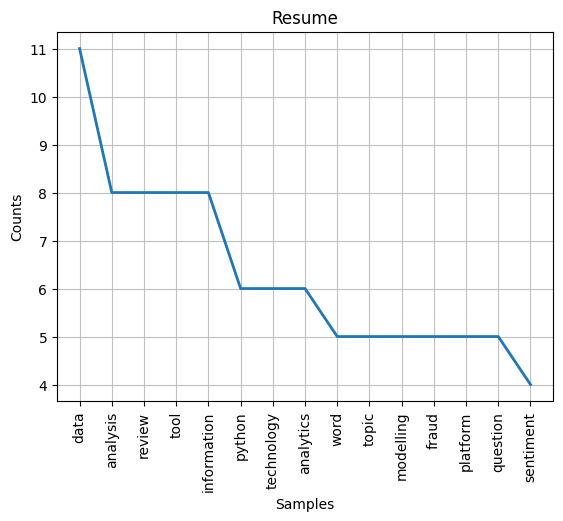

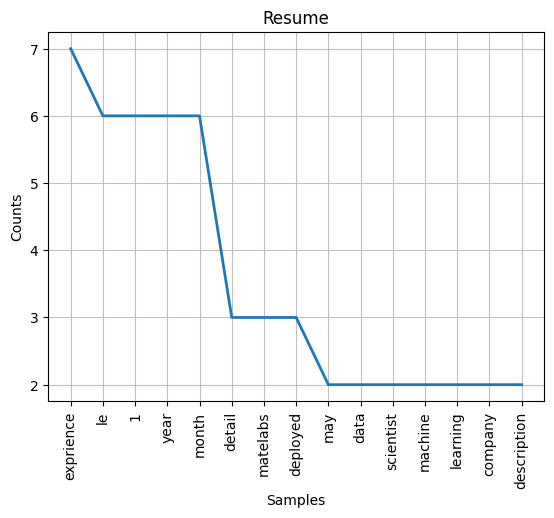

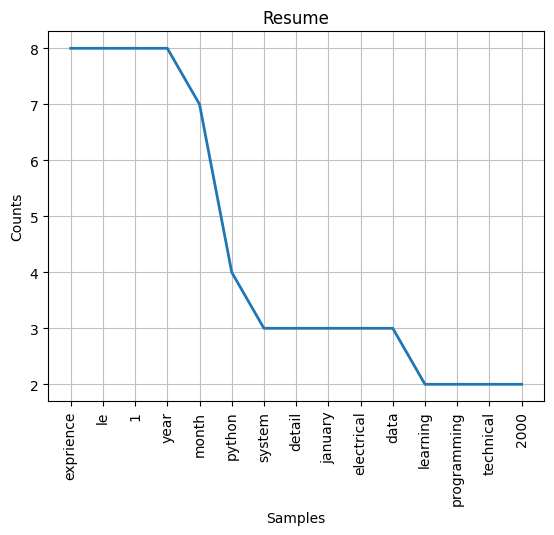

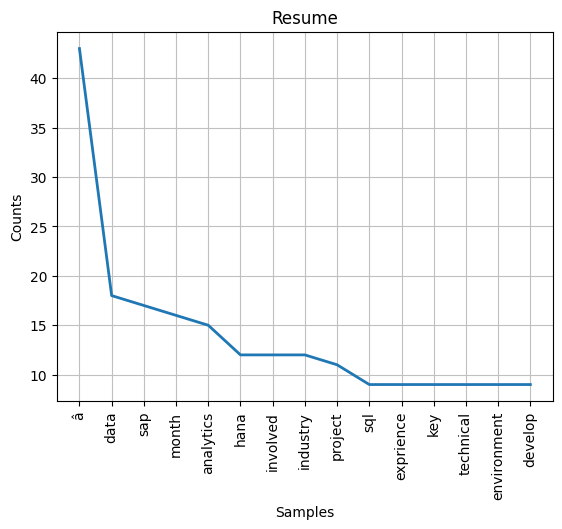

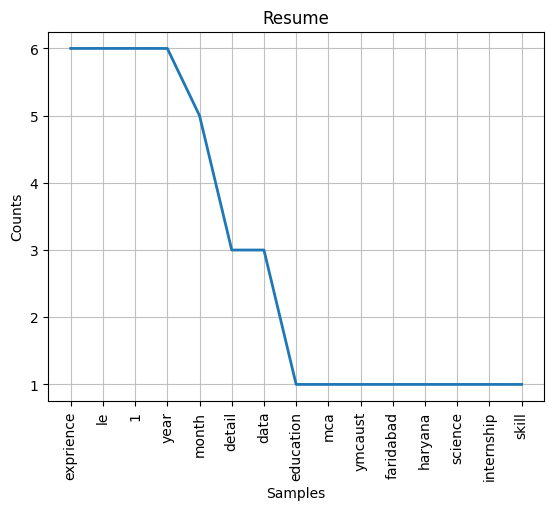

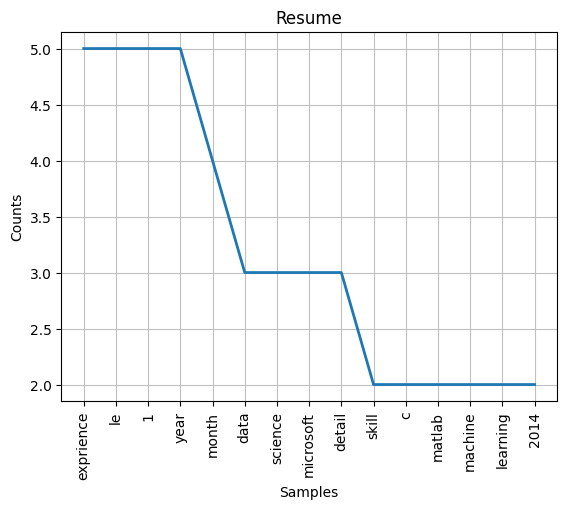

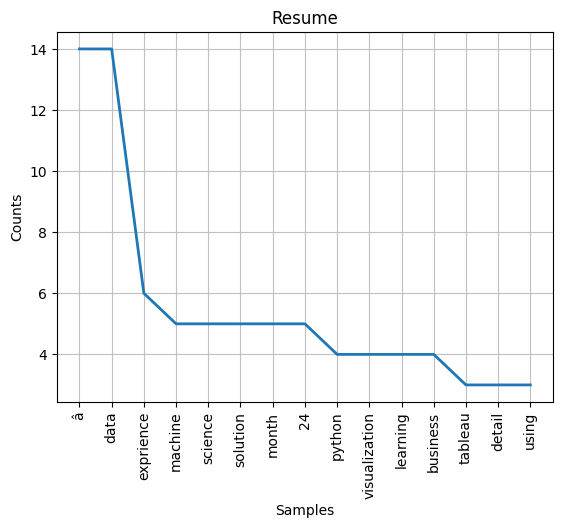

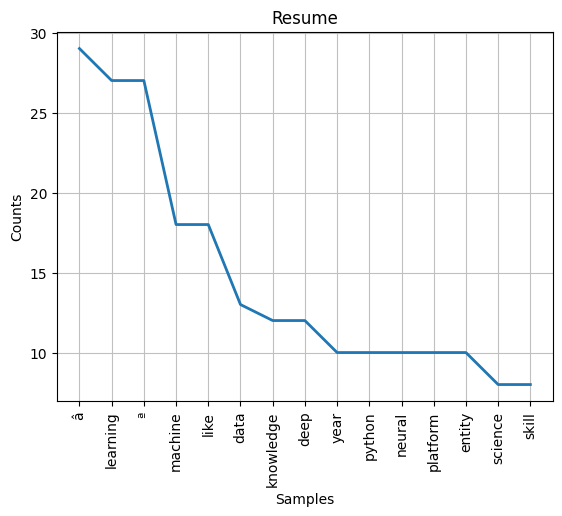

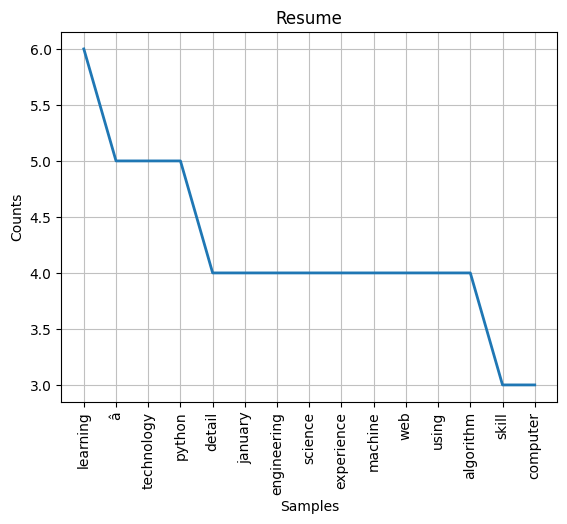

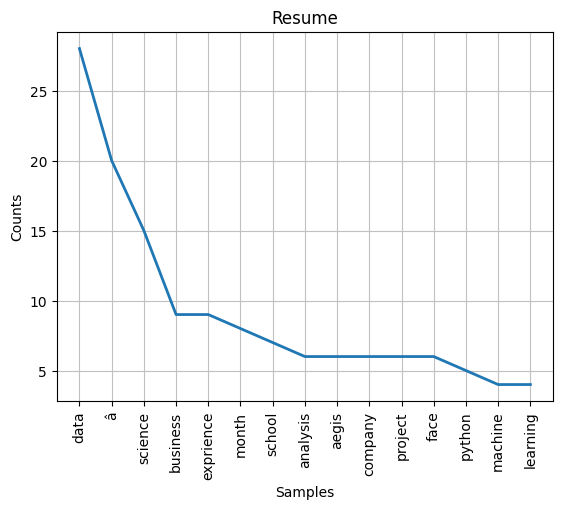

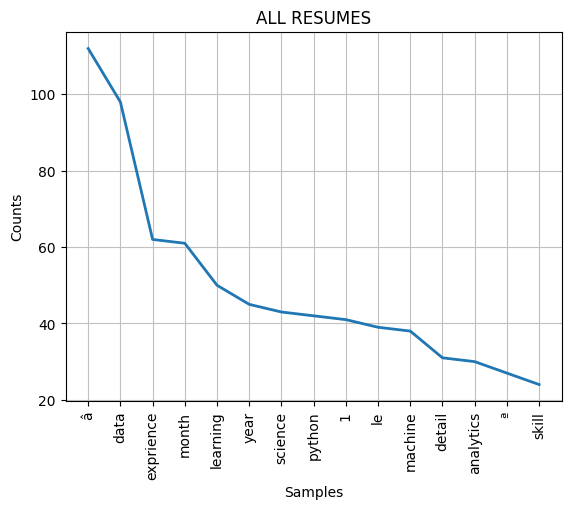

In [14]:
cumulative_list = []
sample = text['Resume'][0:10]
for resume in sample:
    new_list = []
    if isinstance(resume,object):
        new_list = new_list + resume

    # collect all answers
    cumulative_list = cumulative_list + new_list

    # start making graph
        # only produce a graph if not empty
    if not new_list:
        continue
    fd = nltk.FreqDist(filter(None,new_list))
    fd.plot(15,cumulative=False,title='Resume')
    plt.show()

fd_all = nltk.FreqDist(filter(None,cumulative_list))
fd_all.plot(15,cumulative=False,title='ALL RESUMES')
plt.show()
